## Лабораторная работа №2. Feature engineering.

### Задание.
***
**Цель лабораторной работы:** изучение продвинутых способов предварительной обработки данных для дальнейшего формирования моделей.

**Задание:**  
Выбрать набор данных (датасет), содержащий категориальные и числовые признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.) Просьба не использовать датасет, на котором данная задача решалась в лекции.
Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:
1. устранение пропусков в данных;
2. кодирование категориальных признаков;
3. нормализацию числовых признаков.

### Выполнение.
***
Задание буду выполнять на датасете ["Computer Parts (CPUs and GPUs)"](https://www.kaggle.com/iliassekkaf/computerparts). Датасет содержит значения различных характеристик по CPU GPU. В датасете есть как числовые и категориальные признаки так и нестандартные признаки. Есть колонки с пропусками, ненормированными значениями. Датасет состоит из двух наборов данных по CPU и по GPU. Анализировать будем CPU файл.  

Загрузка и обзор датасета:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
%matplotlib inline 
sns.set(style="ticks")

dataset = pd.read_csv('../data/Intel_CPUs.csv', sep=",")
dataset

,Product_Collection,Vertical_Segment,Processor_Number,Status,Launch_Date,Lithography,Recommended_Customer_Price,nb_of_Cores,nb_of_Threads,Processor_Base_Frequency,...,T,Intel_Hyper_Threading_Technology_,Intel_Virtualization_Technology_VTx_,Intel_64_,Instruction_Set,Instruction_Set_Extensions,Idle_States,Thermal_Monitoring_Technologies,Secure_Key,Execute_Disable_Bit
0,7th Generation Intel® Core™ i7 Processors,Mobile,i7-7Y75,Launched,Q3'16,14 nm,$393.00,2,4.0,1.30 GHz,...,100°C,Yes,Yes,Yes,64-bit,"SSE4.1/4.2, AVX 2.0",Yes,Yes,Yes,Yes
1,8th Generation Intel® Core™ i5 Processors,Mobile,i5-8250U,Launched,Q3'17,14 nm,$297.00,4,8.0,1.60 GHz,...,100°C,Yes,Yes,Yes,64-bit,"SSE4.1/4.2, AVX 2.0",Yes,Yes,Yes,Yes
2,8th Generation Intel® Core™ i7 Processors,Mobile,i7-8550U,Launched,Q3'17,14 nm,$409.00,4,8.0,1.80 GHz,...,100°C,Yes,Yes,Yes,64-bit,"SSE4.1/4.2, AVX 2.0",Yes,Yes,Yes,Yes
3,Intel® Core™ X-series Processors,Desktop,i7-3820,End of Life,Q1'12,32 nm,$305.00,4,8.0,3.60 GHz,...,66.8°C,Yes,Yes,Yes,64-bit,"SSE4.2, AVX, AES",Yes,Yes,NaN,Yes
4,7th Generation Intel® Core™ i5 Processors,Mobile,i5-7Y57,Launched,Q1'17,14 nm,$281.00,2,4.0,1.20 GHz,...,100°C,Yes,Yes,Yes,64-bit,"SSE4.1/4.2, AVX 2.0",Yes,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278,6th Generation Intel® Core™ m Processors,Mobile,M5-6Y54,Launched,Q3'15,14 nm,$281.00,2,4.0,1.10 GHz,...,100°C,Yes,Yes,Yes,64-bit,"SSE4.1/4.2, AVX 2.0",Yes,Yes,Yes,Yes
2279,6th Generation Intel® Core™ m Processors,Mobile,M5-6Y57,Launched,Q3'15,14 nm,$281.00,2,4.0,1.10 GHz,...,100°C,Yes,Yes,Yes,64-bit,"SSE4.1/4.2, AVX 2.0",Yes,Yes,Yes,Yes
2280,6th Generation Intel® Core™ m Processors,Mobile,M7-6Y75,Launched,Q3'15,14 nm,$393.00,2,4.0,1.20 GHz,...,100°C,Yes,Yes,Yes,64-bit,"SSE4.1/4.2, AVX 2.0",Yes,Yes,Yes,Yes
2281,5th Generation Intel® Core™ i7 Processors,Mobile,i7-5550U,Launched,Q1'15,14 nm,$426.00,2,4.0,2.00 GHz,...,105°C,Yes,Yes,Yes,64-bit,"SSE4.1/4.2, AVX 2.0",Yes,Yes,Yes,Yes


### Устранение пропусков в данных:
Удалим признаки, число пропущенных значений в которых более 30%:

In [2]:
def get_missing_columns(dataset, percent_min = 0, percent_max = 100, is_print = True):
    columns_with_omissions = []
    row_count = dataset.shape[0]
    for col in dataset.columns:
        percent = round((dataset[col].isnull().sum() / row_count) * 100)
        if is_print:
            print("\"{0}\" ({1}) пропущенно {2}% ".format(col, dataset[col].dtype, percent))
        if percent > percent_min and percent <= percent_max:
            columns_with_omissions.append(col)
    return columns_with_omissions

del_cols_names = get_missing_columns(dataset, percent_min=30)

for col in del_cols_names:
    dataset = dataset.drop(col, axis = 1)

print('Удалено {} признаков: '.format(len(del_cols_names)))
print(del_cols_names)

"Product_Collection" (object) пропущенно 0% 
"Vertical_Segment" (object) пропущенно 0% 
"Processor_Number" (object) пропущенно 15% 
"Status" (object) пропущенно 0% 
"Launch_Date" (object) пропущенно 18% 
"Lithography" (object) пропущенно 3% 
"Recommended_Customer_Price" (object) пропущенно 43% 
"nb_of_Cores" (int64) пропущенно 0% 
"nb_of_Threads" (float64) пропущенно 37% 
"Processor_Base_Frequency" (object) пропущенно 1% 
"Max_Turbo_Frequency" (object) пропущенно 60% 
"Cache" (object) пропущенно 1% 
"Bus_Speed" (object) пропущенно 13% 
"TDP" (object) пропущенно 3% 
"Embedded_Options_Available" (object) пропущенно 0% 
"Conflict_Free" (object) пропущенно 47% 
"Max_Memory_Size" (object) пропущенно 39% 
"Memory_Types" (object) пропущенно 39% 
"Max_nb_of_Memory_Channels" (float64) пропущенно 38% 
"Max_Memory_Bandwidth" (object) пропущенно 50% 
"ECC_Memory_Supported" (object) пропущенно 34% 
"Processor_Graphics_" (float64) пропущенно 100% 
"Graphics_Base_Frequency" (object) пропущенно 63% 
"

In [3]:
# Статистика числа пропусков для каждого оставшегося признака:
get_missing_columns(dataset)
print("Форма датасета: {}".format(str(dataset.shape)))

"Product_Collection" (object) пропущенно 0% 
"Vertical_Segment" (object) пропущенно 0% 
"Processor_Number" (object) пропущенно 15% 
"Status" (object) пропущенно 0% 
"Launch_Date" (object) пропущенно 18% 
"Lithography" (object) пропущенно 3% 
"nb_of_Cores" (int64) пропущенно 0% 
"Processor_Base_Frequency" (object) пропущенно 1% 
"Cache" (object) пропущенно 1% 
"Bus_Speed" (object) пропущенно 13% 
"TDP" (object) пропущенно 3% 
"Embedded_Options_Available" (object) пропущенно 0% 
"T" (object) пропущенно 11% 
"Intel_Hyper_Threading_Technology_" (object) пропущенно 11% 
"Intel_Virtualization_Technology_VTx_" (object) пропущенно 4% 
"Intel_64_" (object) пропущенно 13% 
"Instruction_Set" (object) пропущенно 6% 
"Idle_States" (object) пропущенно 24% 
"Execute_Disable_Bit" (object) пропущенно 13% 
Форма датасета: (2283, 19)


In [4]:
#Стоит исключить ряд признаков, которые не будут полезны при построении моделей ML и/или содержат также большое число пропусков:
dataset = dataset.drop(['Bus_Speed', 'Idle_States', 'Execute_Disable_Bit', 'Processor_Number'], axis = 1)

Если число пропущенных значений мало (менее 7%), то удалим строки:

In [5]:
row_before_dpop = dataset.shape[0]
cols_with_nulls_rows = get_missing_columns(dataset, percent_max = 7, is_print = False)
print("В следующих колонках будут удалены строки: {}".format(str(cols_with_nulls_rows)))
dataset = dataset.dropna(axis = 0, subset = cols_with_nulls_rows)        
row_after_dpop = dataset.shape[0]
print("Число удаленных строк: {}".format(row_before_dpop - row_after_dpop))
print("Оставшиеся признаки с пропусками: {}".format(str(get_missing_columns(dataset, is_print = False))))

В следующих колонках будут удалены строки: ['Lithography', 'Processor_Base_Frequency', 'Cache', 'TDP', 'Intel_Virtualization_Technology_VTx_', 'Instruction_Set']
Число удаленных строк: 225
Оставшиеся признаки с пропусками: ['Launch_Date', 'T', 'Intel_Hyper_Threading_Technology_', 'Intel_64_']


Остались лишь категориальные признаки с пропусками. Запоним эти пропуски с помощью `SimpleImputer` со статегией `most_frequent`:

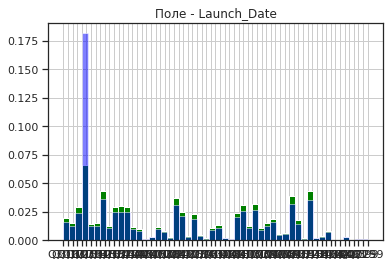

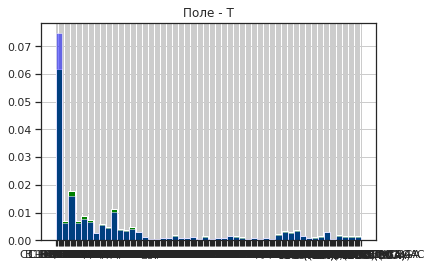

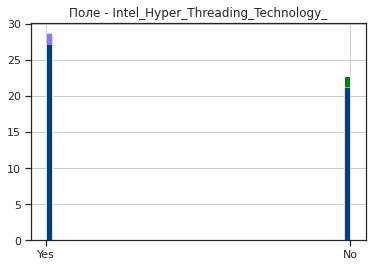

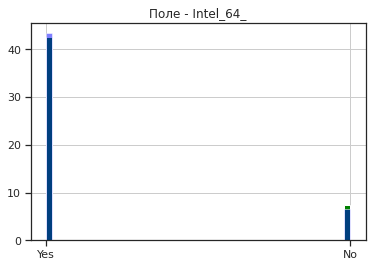

"Product_Collection" (object) пропущенно 0% 
"Vertical_Segment" (object) пропущенно 0% 
"Status" (object) пропущенно 0% 
"Launch_Date" (object) пропущенно 0% 
"Lithography" (object) пропущенно 0% 
"nb_of_Cores" (int64) пропущенно 0% 
"Processor_Base_Frequency" (object) пропущенно 0% 
"Cache" (object) пропущенно 0% 
"TDP" (object) пропущенно 0% 
"Embedded_Options_Available" (object) пропущенно 0% 
"T" (object) пропущенно 0% 
"Intel_Hyper_Threading_Technology_" (object) пропущенно 0% 
"Intel_Virtualization_Technology_VTx_" (object) пропущенно 0% 
"Intel_64_" (object) пропущенно 0% 
"Instruction_Set" (object) пропущенно 0% 


[]

In [6]:
def plot_hist_diff(old_ds, new_ds, cols):
    """
    Разница между распределениями до и после устранения пропусков
    """
    for c in cols:   
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.title.set_text('Поле - ' + str(c))
        old_ds[c].hist(bins=50, ax=ax, density=True, color='green')
        new_ds[c].hist(bins=50, ax=ax, density=True, color='blue', alpha=0.5)
        plt.show()

before_imputing = dataset.copy();
imputing_cols = get_missing_columns(dataset, is_print = False)

imputer = SimpleImputer(strategy = "most_frequent")
for col in imputing_cols:
    dataset[col] = imputer.fit_transform(dataset[[col]])

plot_hist_diff(before_imputing, dataset, imputing_cols);
get_missing_columns(dataset)

### Кодирование категориальных значений
Выполним кодирование Product_Collection с помощью label encoding, а Status закодируем чисом элементов к каждой категории.

In [7]:
# LabelEncoder
label_encoder = LabelEncoder()
print("Product_Collection - оригинальные значения:")
print(dataset["Product_Collection"].unique())
dataset["Product_Collection"] = label_encoder.fit_transform(dataset["Product_Collection"])
print("Product_Collection - перекодированные значения:")
print(dataset["Product_Collection"].unique())

['7th Generation Intel® Core™ i7 Processors'
 '8th Generation Intel® Core™ i5 Processors'
 '8th Generation Intel® Core™ i7 Processors'
 'Intel® Core™ X-series Processors'
 '7th Generation Intel® Core™ i5 Processors'
 'Intel® Celeron® Processor 3000 Series'
 'Intel® Celeron® Processor N Series' 'Intel® Celeron® Processor J Series'
 'Intel® Celeron® Processor G Series' 'Legacy Intel® Pentium® Processor'
 'Intel® Pentium® Processor 2000 Series'
 'Intel® Pentium® Processor 3000 Series'
 'Intel® Pentium® Processor 4000 Series'
 'Intel® Pentium® Processor N Series' 'Intel® Pentium® Processor J Series'
 'Intel® Pentium® Processor 1000 Series' 'Intel® Quark™ SoC X1000 Series'
 'Legacy Intel Atom® Processors' 'Intel® Atom™ Processor N Series'
 'Intel® Atom™ Processor E Series' 'Intel® Atom™ Processor D Series'
 'Intel® Itanium® Processors with 677 MHz FSB'
 'Intel® Itanium® Processors with 533 MHz FSB'
 'Intel® Itanium® Processors with 400 MHz FSB'
 'Intel® Itanium® Processor 9000 Series'
 'Int

In [8]:
# Кодирование числом элементов в группе
print("Status - оригинальные значения:")
print(dataset["Status"].unique())
dataset["Status"] = dataset["Status"].map(dataset.groupby("Status").size()).astype(int)
print("Status - перекодированные значения:")
print(dataset["Status"].unique())

4
['Launched' 'End of Life' 'End of Interactive Support' 'Announced']
[927 415 709   7]
4
